In [1]:
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
with open('../mdout.rep.001', mode='r') as f:
    strs = f.read()

In [4]:
time_list = re.findall(r'TIME\(PS\) =  ([ \d.]+)', strs)
time_list = list(map(lambda x: float(x.strip()), time_list))

In [5]:
temp_list = re.findall(r'TEMP\(K\) =   (\d{3}.\d{2})', strs)
#temp_list = re.findall(r'TEMP0  =       (\d{3}.\d{4})', strs)
temp_list = list(map(lambda x: float(x), temp_list))

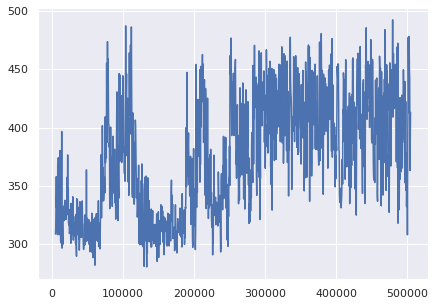

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(time_list[::20], temp_list[::20])

plt.show()

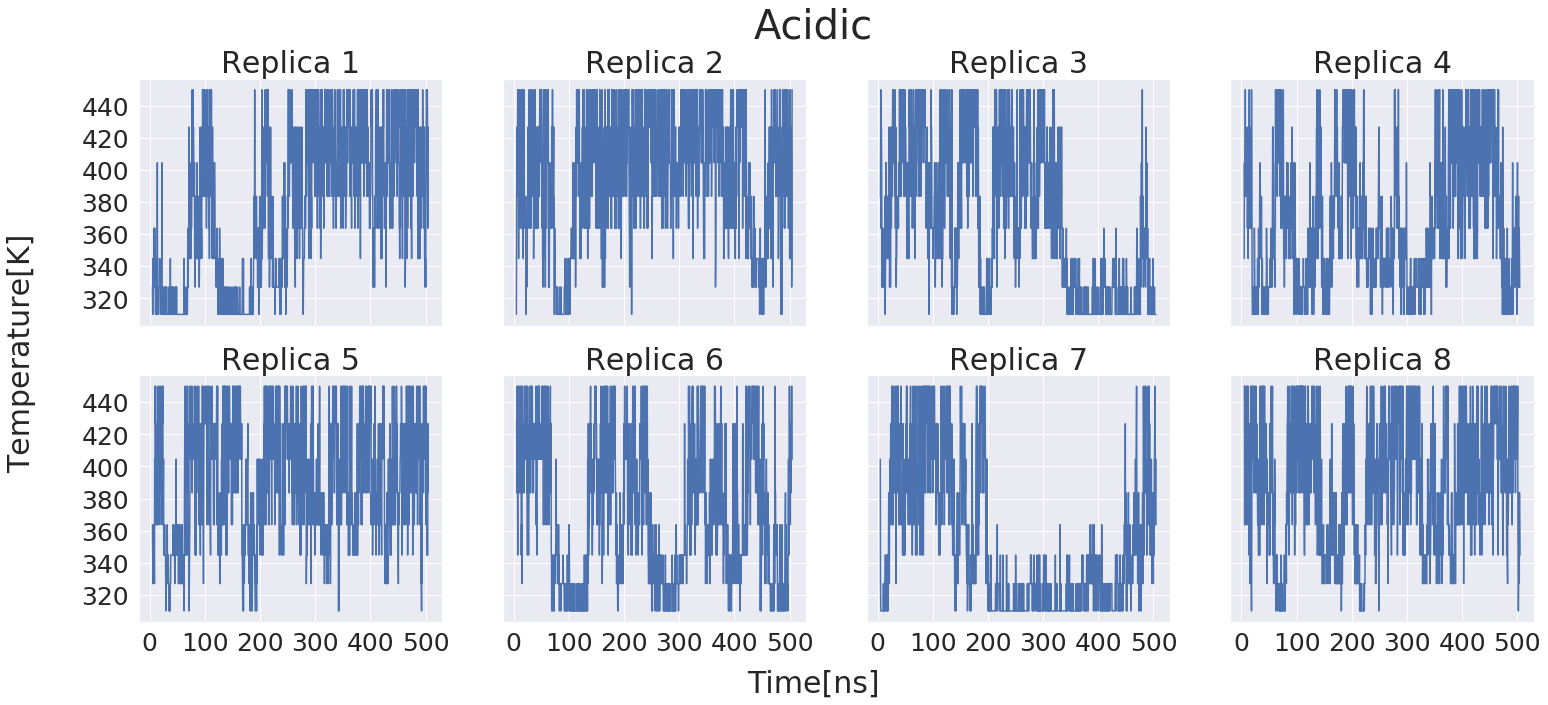

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(25, 10), sharex=True, sharey=True)
axs = axs.flatten()
fig.suptitle('Acidic', fontsize=40)
fig.text(0.5, 0.04, 'Time[ns]', ha='center', va='center', fontsize=30)
fig.text(0.06, 0.5, 'Temperature[K]', ha='center', va='center', rotation='vertical', fontsize=30)
#fig.tight_layout()

for i in range(1, 9):
    with open(f'../mdout.rep.00{i}', mode='r') as f:
        strs = f.read()
    
    time_list = re.findall(r'TIME\(PS\) =  ([ \d.]+)', strs)
    time_list = list(map(lambda x: float(x.strip()) / 1000, time_list))
    
    #temp_list = re.findall(r'TEMP\(K\) =   (\d{3}.\d{2})', strs)
    temp_list = re.findall(r'TEMP0  =       (\d{3}.\d{4})', strs) #TEMP0の値でグラフを作成したい場合はこっち
    temp_list = list(map(lambda x: float(x), temp_list))
    
    axs[i-1].set_title(f'Replica {i}', fontsize=30)
    axs[i-1].plot(time_list[::20], temp_list[::20])
    
    for tick in axs[i-1].xaxis.get_major_ticks():
        tick.label.set_fontsize(25)
    for tick in axs[i-1].yaxis.get_major_ticks():
        tick.label.set_fontsize(25)


plt.savefig('temp-time-acd.png')